In [1]:
#pip install plotly

In [2]:
#pip install yellowbrick

In [3]:
#pip install squarify

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import date,timedelta
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
all_data=pd.read_csv('cleanedData.csv')
all_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ...                         review_id  \
0                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
1                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
2                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
3                     47813  ...  8d5266042046a06655c8db133d120ba5   
4                     75265  ...  e73b67b67587f7644d5bd1a52deb1b01   

  review_score review_comment_title  \
0            4                  NaN   
1            4                  NaN   
2            4                  NaN   
3            4     Muito boa a loja   
4            5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4                                                NaN  2018-08-18 00:00:00   

  review_answer_timestamp payment_sequential payment_type  \
0     2017-10-12 03:43:48                1.0  credit_card   
1     2017-10-12 03:43:48                3.0      voucher   
2     2017-10-12 03:43:48                2.0      voucher   
3     2018-08-08 18:37:50                1.0       boleto   
4     2018-08-22 19:07:58                1.0  credit_card   

   payment_installments payment_value  
0                   1.0         18.12  
1                   1.0          2.00  
2                   1.0         18.59  
3                   1.0        141.46  
4                   3.0        179.12  

[5 rows x 22 columns]

In [3]:
all_data.shape

(104486, 22)

In [4]:
all_data.shape

(104486, 22)

In [5]:
all_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [6]:
all_data.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  176
order_delivered_carrier_date      1898
order_delivered_customer_date     3154
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             92335
review_comment_message           60862
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
dtype: int64

In [7]:
#deelet the nan single row in payment_value column
all_data.dropna(axis=0, how='all', subset=['payment_value'], inplace=True)

In [8]:
#check outliers
#sns.boxplot(all_data['payment_value'])
all_data.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  176
order_delivered_carrier_date      1898
order_delivered_customer_date     3154
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             92334
review_comment_message           60862
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

In [9]:
#convert ['order_purchase_timestamp','order_approved_at', 
#'order_delivered_carrier_date','order_delivered_customer_date', 
#'order_estimated_delivery_date'] to datetime
date_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns :
    all_data[col] = pd.to_datetime(all_data[col])
all_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
payment_sequential                      float64
payment_type                             object
payment_installments                    

In [10]:
all_data['order_delivered_carrier_date'].describe()

count                  102587
unique                  81017
top       2018-05-09 15:48:00
freq                       47
first     2016-10-08 10:34:01
last      2018-09-11 19:48:28
Name: order_delivered_carrier_date, dtype: object

In [11]:
all_data['order_status'].value_counts()

delivered      101333
shipped          1177
canceled          668
unavailable       651
invoiced          329
processing        320
created             5
approved            2
Name: order_status, dtype: int64

In [12]:
#we consider delivered orders to analyse
all_data_delivered=all_data.query('order_status=="delivered"')
all_data_delivered.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ...                         review_id  \
0                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
1                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
2                      3149  ...  a54f0611adc9ed256b57ede6b6eb5114   
3                     47813  ...  8d5266042046a06655c8db133d120ba5   
4                     75265  ...  e73b67b67587f7644d5bd1a52deb1b01   

  review_score review_comment_title  \
0            4                  NaN   
1            4                  NaN   
2            4                  NaN   
3            4     Muito boa a loja   
4            5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4                                                NaN  2018-08-18 00:00:00   

  review_answer_timestamp payment_sequential payment_type  \
0     2017-10-12 03:43:48                1.0  credit_card   
1     2017-10-12 03:43:48                3.0      voucher   
2     2017-10-12 03:43:48                2.0      voucher   
3     2018-08-08 18:37:50                1.0       boleto   
4     2018-08-22 19:07:58                1.0  credit_card   

   payment_installments payment_value  
0                   1.0         18.12  
1                   1.0          2.00  
2                   1.0         18.59  
3                   1.0        141.46  
4                   3.0        179.12  

[5 rows x 22 columns]

In [13]:
all_data_delivered['month']=all_data_delivered['order_purchase_timestamp'].dt.month.astype(str).str.zfill(2)
all_data_delivered['year']=all_data_delivered['order_purchase_timestamp'].dt.year.astype(str)
all_data_delivered['date']=all_data_delivered['year']+all_data_delivered['month']
all_data_delivered.date = pd.to_numeric(all_data_delivered.date, errors='coerce')

<ipython-input-13-482ccec793fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_delivered['month']=all_data_delivered['order_purchase_timestamp'].dt.month.astype(str).str.zfill(2)
<ipython-input-13-482ccec793fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_delivered['year']=all_data_delivered['order_purchase_timestamp'].dt.year.astype(str)
<ipython-input-13-482ccec793fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [14]:
print(all_data_delivered['date'])

0         201710
1         201710
2         201710
3         201807
4         201808
           ...  
104481    201703
104482    201802
104483    201708
104484    201801
104485    201803
Name: date, Length: 101333, dtype: int64


In [15]:
all_data_delivered.sort_values(by='date',ascending=True)

order_id                       customer_id  \
78611   8729a8f7c27d03afe731463091711489  11ec73ddb032be97ae8f0219cce6cfa3   
39374   df30f88407baa98218b16abe7032899a  705ea3eb85deaed8f68356890e5e3c7d   
91426   50f357099566f1be7abfaf8d9dc5b004  04356ca5b944f7a92d6b103bdb44268a   
102461  63638a6806d67773f3adba8534553fff  16e14c1e6e050fe6730c961ff638ca23   
48905   5f4c8250b9e6ee47971e0b19da4aa0f2  14a2912b7f370c345cebcda474774f55   
...                                  ...                               ...   
93519   16bca95ea5b4327cdf4a33ba25fa9760  7c8df632741577655c609c9d71b69720   
29343   6ee0abe7b83e046f6ca20743a8c6e7c7  cd6b75f7bf6ec7f8435a42d97e8b240e   
10644   109dfb5756c526e783783356f4384b4e  36221a58d1cd5b882b7dcec3e5f72408   
74644   3f2f8de95118170021d99d5fbc532352  9be040aacd72b1f7c7273d2c837f25cd   
10983   755a4d6ab201a238e51bc1d1ab18365a  4ff06273ad2be01eeb93e0a2e4babc09   

       order_status order_purchase_timestamp   order_approved_at  \
78611     delivered      2016-10-05 17:16:17 2016-10-06 15:52:09   
39374     delivered      2016-10-08 11:50:02 2016-10-08 13:22:12   
91426     delivered      2016-10-07 17:13:42 2016-10-07 17:31:48   
102461    delivered      2016-10-04 13:22:56 2016-10-04 13:47:45   
48905     delivered      2016-10-08 10:31:00 2016-10-08 11:12:53   
...             ...                      ...                 ...   
93519     delivered      2018-08-12 16:11:49 2018-08-12 16:25:18   
29343     delivered      2018-08-06 00:58:48 2018-08-06 01:10:12   
10644     delivered      2018-08-16 15:13:00 2018-08-16 15:30:14   
74644     delivered      2018-08-06 20:28:27 2018-08-06 20:44:29   
10983     delivered      2018-08-12 22:59:28 2018-08-13 22:55:18   

       order_delivered_carrier_date order_delivered_customer_date  \
78611           2016-10-30 14:02:20           2016-11-01 18:18:59   
39374           2016-10-12 13:22:13           2016-10-15 13:22:13   
91426           2016-10-21 16:34:06           2016-10-24 16:34:06   
102461          2016-11-17 15:53:01           2016-11-25 13:17:37   
48905           2016-11-09 11:34:00           2016-11-18 16:05:46   
...                             ...                           ...   
93519           2018-08-21 13:15:00           2018-08-28 20:03:39   
29343           2018-08-07 07:33:00           2018-08-10 15:22:27   
10644           2018-08-16 15:52:00           2018-08-21 20:06:19   
74644           2018-08-10 14:26:00           2018-08-13 17:42:32   
10983           2018-08-14 15:48:00           2018-08-22 22:58:45   

       order_estimated_delivery_date                customer_unique_id  \
78611                     2016-12-01  6b4f7aec68e9574e9383d72653ae0ea1   
39374                     2016-12-06  b997e25246ed06045ed885ca74385b4d   
91426                     2016-11-29  2774c87659bdca5ddfc6df1a688a54e5   
102461                    2016-11-28  df2988ba3ed226b10521a0e4da849b61   
48905                     2016-12-06  48eb05fb37e33f3079495d0145ef2711   
...                              ...                               ...   
93519                     2018-09-05  789399a42b8759f374cc489d7c799090   
29343                     2018-08-15  a358f5086c8e4e3e935c9bbf8b6db573   
10644                     2018-08-21  680f14d7d05037d2685474299c6af319   
74644                     2018-08-13  dd7a43cb9bd97edbec9093db9d6591de   
10983                     2018-09-10  d3409ea9c3d5c452fdb21ccd23aaba7a   

        customer_zip_code_prefix  ...  \
78611                      99950  ...   
39374                      74845  ...   
91426                       4561  ...   
102461                     23092  ...   
48905                      29122  ...   
...                          ...  ...   
93519                      28051  ...   
29343                       9660  ...   
10644                      11075  ...   
74644                       5411  ...   
10983                      78200  ...   

                                   review_comment_message  \
78611 

In [16]:
all_data_delivered=all_data_delivered.drop(['month','year'],axis=1)

In [17]:
# now we have to analyse the payments column in the dataset
payments=['payment_sequential','payment_installments','payment_value']
all_data[payments].describe()

payment_sequential  payment_installments  payment_value
count       104485.000000         104485.000000  104485.000000
mean             1.093372              2.856630     153.925122
std              0.709263              2.690259     217.116119
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.780000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.690000
max             29.000000             24.000000   13664.080000

{'whiskers': [<matplotlib.lines.Line2D at 0x130c6c06e20>,
 'caps': [<matplotlib.lines.Line2D at 0x130c6c16520>,
 'boxes': [<matplotlib.lines.Line2D at 0x130c6c06ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x130c6c16be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x130c6c16ee0>],
 'means': []}

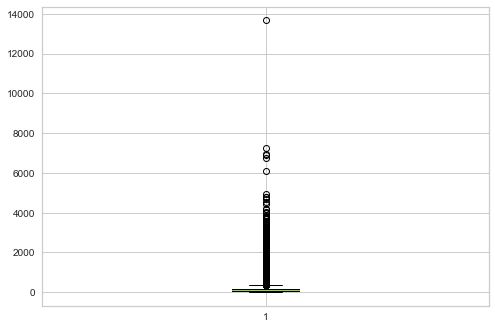

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(all_data['payment_value'])

In [19]:
# we must see if the outliers represent a significant group of clients or not
z = np.abs(stats.zscore(all_data['payment_value']))
payments_outliers = all_data[(z > 3)]
payments_outliers.describe()
# so we keep the outliers because they  represent a significant group of clients

customer_zip_code_prefix  review_score  payment_sequential  \
count               1812.000000   1812.000000         1812.000000   
mean               41002.528698      3.836093            1.008830   
std                29613.102564      1.552028            0.093578   
min                 1020.000000      1.000000            1.000000   
25%                13983.000000      3.000000            1.000000   
50%                33620.000000      5.000000            1.000000   
75%                68440.000000      5.000000            1.000000   
max                99670.000000      5.000000            2.000000   

       payment_installments  payment_value  
count           1812.000000    1812.000000  
mean               6.372517    1333.275651  
std                3.990571     705.267000  
min                1.000000     805.750000  
25%                1.000000     913.700000  
50%                8.000000    1121.945000  
75%               10.000000    1480.805000  
max               24.000000   13664.080000

In [20]:
all_data_delivered.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ... review_score review_comment_title  \
0                      3149  ...            4                  NaN   
1                      3149  ...            4                  NaN   
2                      3149  ...            4                  NaN   
3                     47813  ...            4     Muito boa a loja   
4                     75265  ...            5                  NaN   

                              review_comment_message  review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...   2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...   2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...   2017-10-11 00:00:00   
3                               Muito bom o produto.   2018-08-08 00:00:00   
4                                                NaN   2018-08-18 00:00:00   

  review_answer_timestamp payment_sequential payment_type  \
0     2017-10-12 03:43:48                1.0  credit_card   
1     2017-10-12 03:43:48                3.0      voucher   
2     2017-10-12 03:43:48                2.0      voucher   
3     2018-08-08 18:37:50                1.0       boleto   
4     2018-08-22 19:07:58                1.0  credit_card   

  payment_installments  payment_value    date  
0                  1.0          18.12  201710  
1                  1.0           2.00  201710  
2                  1.0          18.59  201710  
3                  1.0         141.46  201807  
4                  3.0         179.12  201808  

[5 rows x 23 columns]

In [21]:
all_data_delivered.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        8
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             89585
review_comment_message           59830
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
date                                 0
dtype: int64

In [22]:
#create RFM Data set
#Recency — How recently did the customer purchase?
#Frequency — How often do they purchase?
#Monetary Value — How much do they spend?

last_date = all_data_delivered['order_delivered_carrier_date'].max() + timedelta(days=1)
rfm = all_data_delivered.groupby('customer_id').agg({
    'order_delivered_carrier_date': lambda x : (last_date - x.max()).days,
    'order_id':lambda x : len(x),
    'payment_value': 'sum'
    
})


In [23]:
rfm.head()

order_delivered_carrier_date  order_id  \
customer_id                                                                
00012a2ce6f8dcda20d059ce98491703                         299.0         1   
000161a058600d5901f007fab4c27140                         420.0         1   
0001fd6190edaaf884bcaf3d49edf079                         560.0         1   
0002414f95344307404f0ace7a26f1d5                         389.0         1   
000379cdec625522490c315e70c7a9fb                         161.0         1   

                                  payment_value  
customer_id                                      
00012a2ce6f8dcda20d059ce98491703         114.74  
000161a058600d5901f007fab4c27140          67.41  
0001fd6190edaaf884bcaf3d49edf079         195.42  
0002414f95344307404f0ace7a26f1d5         179.35  
000379cdec625522490c315e70c7a9fb         107.01

In [24]:
# Change the name of columns
rfm.columns=['Recency','Frequency','Monetary']
rfm.reset_index()

customer_id  Recency  Frequency  Monetary
0      00012a2ce6f8dcda20d059ce98491703    299.0          1    114.74
1      000161a058600d5901f007fab4c27140    420.0          1     67.41
2      0001fd6190edaaf884bcaf3d49edf079    560.0          1    195.42
3      0002414f95344307404f0ace7a26f1d5    389.0          1    179.35
4      000379cdec625522490c315e70c7a9fb    161.0          1    107.01
...                                 ...      ...        ...       ...
96472  fffcb937e9dd47a13f05ecb8290f4d3e    179.0          1     91.91
96473  fffecc9f79fd8c764f843e9951b11341    165.0          3     81.36
96474  fffeda5b6d849fbd39689bb92087f431    110.0          1     63.13
96475  ffff42319e9b2d713724ae527742af25     89.0          1    214.13
96476  ffffa3172527f765de70084a7e53aae8    368.0          1     45.50

[96477 rows x 4 columns]

In [25]:
df2=all_data_delivered.loc[:,['customer_id','date']]

In [26]:
df2.sort_values(by='date')

customer_id    date
78611   11ec73ddb032be97ae8f0219cce6cfa3  201610
39374   705ea3eb85deaed8f68356890e5e3c7d  201610
91426   04356ca5b944f7a92d6b103bdb44268a  201610
102461  16e14c1e6e050fe6730c961ff638ca23  201610
48905   14a2912b7f370c345cebcda474774f55  201610
...                                  ...     ...
93519   7c8df632741577655c609c9d71b69720  201808
29343   cd6b75f7bf6ec7f8435a42d97e8b240e  201808
10644   36221a58d1cd5b882b7dcec3e5f72408  201808
74644   9be040aacd72b1f7c7273d2c837f25cd  201808
10983   4ff06273ad2be01eeb93e0a2e4babc09  201808

[101333 rows x 2 columns]

In [27]:
rfm=rfm.merge(df2, on='customer_id')

In [28]:
rfm

customer_id  Recency  Frequency  Monetary    date
0       00012a2ce6f8dcda20d059ce98491703    299.0          1    114.74  201711
1       000161a058600d5901f007fab4c27140    420.0          1     67.41  201707
2       0001fd6190edaaf884bcaf3d49edf079    560.0          1    195.42  201702
3       0002414f95344307404f0ace7a26f1d5    389.0          1    179.35  201708
4       000379cdec625522490c315e70c7a9fb    161.0          1    107.01  201804
...                                  ...      ...        ...       ...     ...
101328  fffecc9f79fd8c764f843e9951b11341    165.0          3     81.36  201803
101329  fffecc9f79fd8c764f843e9951b11341    165.0          3     81.36  201803
101330  fffeda5b6d849fbd39689bb92087f431    110.0          1     63.13  201805
101331  ffff42319e9b2d713724ae527742af25     89.0          1    214.13  201806
101332  ffffa3172527f765de70084a7e53aae8    368.0          1     45.50  201709

[101333 rows x 5 columns]

In [29]:
rfm.isna().sum()

customer_id    0
Recency        2
Frequency      0
Monetary       0
date           0
dtype: int64

In [30]:
rfm=rfm.dropna()

In [31]:
rfm.isna().sum()

customer_id    0
Recency        0
Frequency      0
Monetary       0
date           0
dtype: int64

In [32]:
data_4month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201702)]
data_6month=rfm[(rfm['date']>= 201610) & (rfm['date']< 201704)]
data_8month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201706)]
data_10month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201708)]
data_12month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201710)]
data_14month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201712)]
data_16month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201802)]
data_18month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201804)]
data_20month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201806)]
data_22month=rfm[(rfm['date'] >= 201610) & (rfm['date']< 201808)]
data_23month=rfm[(rfm['date'] >= 201610) & (rfm['date']<= 201808)]

In [33]:
liste=[(data_4month,'data_4month'),(data_6month,'data_6month'),(data_8month,'data_8month'),(data_10month,'data_10month'),(data_12month,'data_12month'),(data_14month,'data_14month'),(data_16month,'data_16month'),(data_18month,'data_18month'),(data_20month,'data_20month'),(data_22month,'data_22month'),(data_23month,'data_23month')]

#dataset=['data_4month','data_5month','data_6month','data_7month','data_8month','data_9month','data_10month','data_11month','data_rest']
models={}
c=0
for i in liste:
        clean_i=i[0].drop(['customer_id','date'],axis=1)
        print(clean_i.shape)
        kmeans = KMeans(n_clusters=4,random_state=1231)
        kmeans.fit(clean_i)
        models[c]=kmeans
        c=c+1
        

(1099, 3)
(5571, 3)
(11838, 3)
(19385, 3)
(28219, 3)
(40606, 3)
(53758, 3)
(67956, 3)
(82045, 3)
(94794, 3)
(101331, 3)


In [34]:
print(models)

{0: KMeans(n_clusters=4, random_state=1231), 1: KMeans(n_clusters=4, random_state=1231), 2: KMeans(n_clusters=4, random_state=1231), 3: KMeans(n_clusters=4, random_state=1231), 4: KMeans(n_clusters=4, random_state=1231), 5: KMeans(n_clusters=4, random_state=1231), 6: KMeans(n_clusters=4, random_state=1231), 7: KMeans(n_clusters=4, random_state=1231), 8: KMeans(n_clusters=4, random_state=1231), 9: KMeans(n_clusters=4, random_state=1231), 10: KMeans(n_clusters=4, random_state=1231)}


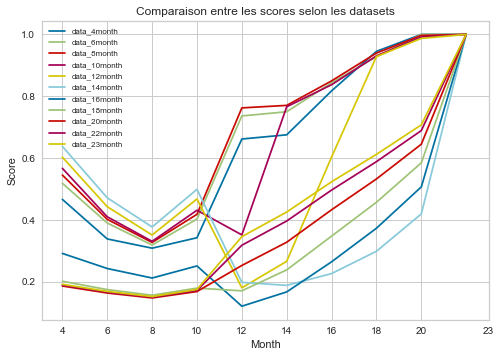

In [35]:
ARIS={}
l=[]
for i,t in enumerate(liste):
    s=[]
    for j,model in models.items():
        clean_i=t[0].drop(['customer_id','date'],axis=1)
        ypredict=models[j].predict(clean_i)
        ytrue=models[10].predict(clean_i)
        ari=adjusted_rand_score(ytrue,ypredict)
        if j!=0:
            s.append(ari)
    l.append(t[1])
    plt.plot(range(4,24,2),s)
    plt.xticks([4,6,8,10,12,14,16,18,20,23])
    #plt.title(t[1])
    ARIS[t[1]]=s
plt.title('Comparaison entre les scores selon les datasets')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(l,fontsize=8,loc='upper left')
plt.show()
    




In [36]:
print(ARIS)

{'data_4month': [0.46599086136560086, 0.3379880826013873, 0.30808659145894246, 0.3418391334801627, 0.6614167514906705, 0.6750108633994518, 0.8172699922260568, 0.9451716206955735, 1.0, 1.0], 'data_6month': [0.5179842329587473, 0.38951404237405834, 0.3182582118435163, 0.40247288281871224, 0.7361542861249306, 0.7496541692934124, 0.8434334835636245, 0.9275586400538239, 1.0, 1.0], 'data_8month': [0.5447393707774459, 0.4013559728719779, 0.3267204313430534, 0.41769276771498365, 0.7621445304449546, 0.7702453614225032, 0.8496179298839626, 0.939578757909801, 0.9967141640303422, 1.0], 'data_10month': [0.5664359005465684, 0.4096405412526468, 0.3302468737245713, 0.4308739263770995, 0.3510117060677333, 0.7658577832059983, 0.8371342770572028, 0.9304765273161663, 0.9917695440327461, 1.0], 'data_12month': [0.6025816059904019, 0.442299786176144, 0.3505655649202552, 0.4674291266297053, 0.17977012627268496, 0.2655467091086652, 0.603106995594188, 0.9282413300707708, 0.9870773695146916, 1.0], 'data_14month'

In [37]:
clean=data_4month.drop(['customer_id','date'],axis=1)
ypredict=models[2].predict(clean)
ytrue=models[8].predict(clean)
adjusted_rand_score(ytrue,ypredict)

0.3635004513797478

In [38]:
rfm=rfm.merge(all_data, on='customer_id')
rfm.head()

customer_id  Recency  Frequency  Monetary    date  \
0  00012a2ce6f8dcda20d059ce98491703    299.0          1    114.74  201711   
1  000161a058600d5901f007fab4c27140    420.0          1     67.41  201707   
2  0001fd6190edaaf884bcaf3d49edf079    560.0          1    195.42  201702   
3  0002414f95344307404f0ace7a26f1d5    389.0          1    179.35  201708   
4  000379cdec625522490c315e70c7a9fb    161.0          1    107.01  201804   

                           order_id order_status order_purchase_timestamp  \
0  5f79b5b0931d63f1a42989eb65b9da6e    delivered      2017-11-14 16:08:26   
1  a44895d095d7e0702b6a162fa2dbeced    delivered      2017-07-16 09:40:32   
2  316a104623542e4d75189bb372bc5f8d    delivered      2017-02-28 11:06:43   
3  5825ce2e88d5346438686b0bba99e5ee    delivered      2017-08-16 13:09:20   
4  0ab7fb08086d4af9141453c91878ed7a    delivered      2018-04-02 13:42:17   

    order_approved_at order_delivered_carrier_date  ...  \
0 2017-11-14 16:35:32          2017-11-17 15:32:08  ...   
1 2017-07-16 09:55:12          2017-07-19 19:09:37  ...   
2 2017-02-28 11:15:20          2017-03-01 15:24:20  ...   
3 2017-08-17 03:10:27          2017-08-19 11:34:29  ...   
4 2018-04-04 03:10:19          2018-04-04 18:11:09  ...   

                          review_id review_score review_comment_title  \
0  65645c124061b43b2edc38b05ee76aab            1                  NaN   
1  862cae301754fcafa8129022c8eca937            4                  NaN   
2  238e7cc8c4579a3d4db8f2a211db5b06            5                  NaN   
3  c3a9be1f602ecba1c7bdff5639c975fe            5                  NaN   
4  fab6aa1b4c382a27ae8625faa342c229            4                  NaN   

    review_comment_message review_creation_date review_answer_timestamp  \
0  Tudo dentro do esperado  2017-11-29 00:00:00     2017-12-04 12:00:07   
1                      NaN  2017-07-26 00:00:00     2017-07-27 18:17:27   
2                Muito bom  2017-03-07 00:00:00     2017-03-08 00:23:34   
3                      NaN  2017-09-14 00:00:00     2017-09-15 00:26:09   
4                      NaN  2018-04-14 00:00:00     2018-04-16 20:17:51   

  payment_sequential  payment_type payment_installments payment_value  
0                1.0   credit_card                  8.0        114.74  
1                1.0   credit_card                  5.0         67.41  
2                1.0   credit_card                 10.0        195.42  
3                1.0        boleto                  1.0        179.35  
4                1.0        boleto                  1.0        107.01  

[5 rows x 26 columns]

In [39]:
rfm=rfm.loc[:,['customer_id','Recency','Frequency','Monetary','review_score']]
rfm.head()

customer_id  Recency  Frequency  Monetary  \
0  00012a2ce6f8dcda20d059ce98491703    299.0          1    114.74   
1  000161a058600d5901f007fab4c27140    420.0          1     67.41   
2  0001fd6190edaaf884bcaf3d49edf079    560.0          1    195.42   
3  0002414f95344307404f0ace7a26f1d5    389.0          1    179.35   
4  000379cdec625522490c315e70c7a9fb    161.0          1    107.01   

   review_score  
0             1  
1             4  
2             5  
3             5  
4             4

C:\Users\wha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


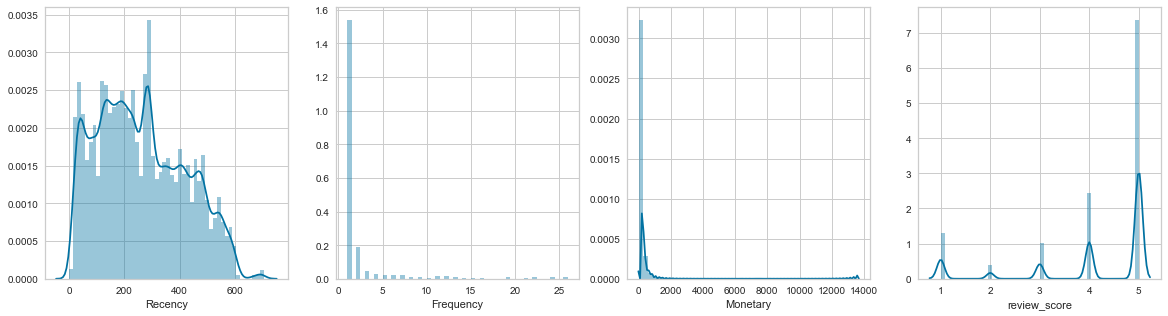

In [40]:
rfm1=rfm.drop(['customer_id'],axis=1)
fig, axes = plt.subplots(1,4, figsize=(20,5))
for i, feature in enumerate(list(rfm1.columns)):
    sns.distplot(rfm1[feature],ax=axes[i])

In [41]:
#deleting na
rfm.isna().sum()
rfm.dropna(inplace=True)


In [42]:
rfm.isna().sum()

customer_id     0
Recency         0
Frequency       0
Monetary        0
review_score    0
dtype: int64

In [43]:
rfm.describe()
#rfm.shape

Recency      Frequency       Monetary   review_score
count  120909.000000  120909.000000  120909.000000  120909.000000
mean      261.761655       2.314840     163.582169       4.132819
std       155.104751       3.951462     220.046472       1.310069
min         1.000000       1.000000       9.590000       1.000000
25%       135.000000       1.000000      62.790000       4.000000
50%       244.000000       1.000000     106.070000       5.000000
75%       380.000000       1.000000     180.910000       5.000000
max       704.000000      26.000000   13664.080000       5.000000

In [44]:
#RFM DESCRIPTION based on RFM score
# Rank each metric R , F & M
rfm['R_rank'] = rfm['Recency'].rank( ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
rfm.head()
# normalize each rank with Max rank
rfm['R_rank_norm']=(rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm']=(rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm']=(rfm['F_rank']/rfm['M_rank'].max())*100
rfm.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm['RFM_Score']=0.15*rfm['R_rank_norm']+0.28*rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm=rfm.round(0)
rfm.head()

customer_id  Recency  Frequency  Monetary  \
0  00012a2ce6f8dcda20d059ce98491703    299.0          1     115.0   
1  000161a058600d5901f007fab4c27140    420.0          1      67.0   
2  0001fd6190edaaf884bcaf3d49edf079    560.0          1     195.0   
3  0002414f95344307404f0ace7a26f1d5    389.0          1     179.0   
4  000379cdec625522490c315e70c7a9fb    161.0          1     107.0   

   review_score   R_rank   F_rank   M_rank  R_rank_norm  F_rank_norm  \
0             1  44850.0  46542.0  65170.0         37.0         39.0   
1             4  23157.0  46542.0  34336.0         19.0         39.0   
2             5   3454.0  46542.0  94148.0          3.0         39.0   
3             5  29054.0  46542.0  90401.0         24.0         39.0   
4             4  83299.0  46542.0  61100.0         69.0         39.0   

   M_rank_norm  RFM_Score  
0         38.0       38.0  
1         38.0       36.0  
2         38.0       33.0  
3         38.0       36.0  
4         38.0       43.0

In [45]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
rfm["Customer_segment"]=np.where(rfm['RFM_Score'] > 75 ,"High Value Customer",(np.where(rfm['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
rfm.head()

customer_id  Recency  Frequency  Monetary  \
0  00012a2ce6f8dcda20d059ce98491703    299.0          1     115.0   
1  000161a058600d5901f007fab4c27140    420.0          1      67.0   
2  0001fd6190edaaf884bcaf3d49edf079    560.0          1     195.0   
3  0002414f95344307404f0ace7a26f1d5    389.0          1     179.0   
4  000379cdec625522490c315e70c7a9fb    161.0          1     107.0   

   review_score   R_rank   F_rank   M_rank  R_rank_norm  F_rank_norm  \
0             1  44850.0  46542.0  65170.0         37.0         39.0   
1             4  23157.0  46542.0  34336.0         19.0         39.0   
2             5   3454.0  46542.0  94148.0          3.0         39.0   
3             5  29054.0  46542.0  90401.0         24.0         39.0   
4             4  83299.0  46542.0  61100.0         69.0         39.0   

   M_rank_norm  RFM_Score    Customer_segment  
0         38.0       38.0  Low value Customer  
1         38.0       36.0  Low value Customer  
2         38.0       33.0  Low value Customer  
3         38.0       36.0  Low value Customer  
4         38.0       43.0  Low value Customer

In [46]:
centroid_df = rfm.groupby('Customer_segment')[['Recency', 'Frequency', 'Monetary','customer_id']].agg({'Recency': 'mean','Frequency':'mean','Monetary':'mean','customer_id':'nunique'})
centroid_df = centroid_df.rename(columns = {'customer_id':'NumBuyers'})
centroid_df
#High Value Customer: They are your loyal customers.So provide constant support via customer service
#Medium Value Customer: Send them personalized emails with offers and encourage them to shop more
#Low Value Customer: These customers are about to churn or went into a dormant stage,apply reactivation strategies for them

Recency  Frequency    Monetary  NumBuyers
Customer_segment                                                   
High Value Customer    275.746364   7.789071  173.712675       2119
Low value Customer     249.196524   1.000000  159.881246      93083
Medium Value Customer  425.633378   2.039754  185.949491       1273

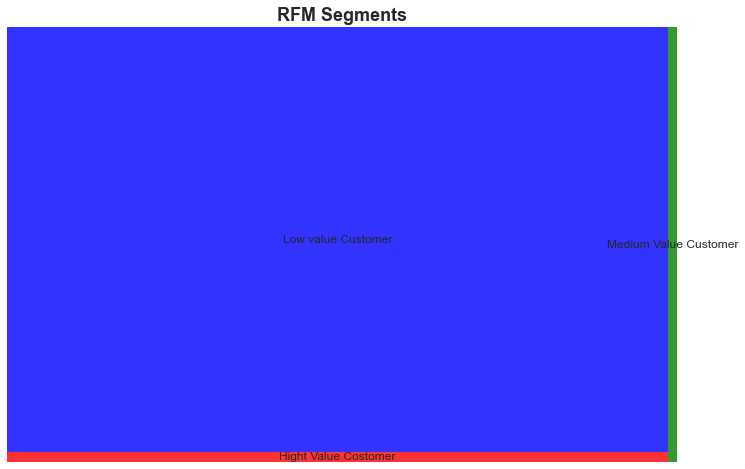

In [47]:
#Description of the RFM segments
#Create our RFM Segment plot and resize it.
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
color = ['red', 'blue', 'green']
squarify.plot(sizes=centroid_df['NumBuyers'], 
              label=['Hight Value Costomer','Low value Customer','Medium Value Customer'], alpha=0.8,color=color)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [48]:
rfm

customer_id  Recency  Frequency  Monetary  \
0       00012a2ce6f8dcda20d059ce98491703    299.0          1     115.0   
1       000161a058600d5901f007fab4c27140    420.0          1      67.0   
2       0001fd6190edaaf884bcaf3d49edf079    560.0          1     195.0   
3       0002414f95344307404f0ace7a26f1d5    389.0          1     179.0   
4       000379cdec625522490c315e70c7a9fb    161.0          1     107.0   
...                                  ...      ...        ...       ...   
120904  fffecc9f79fd8c764f843e9951b11341    165.0          3      81.0   
120905  fffecc9f79fd8c764f843e9951b11341    165.0          3      81.0   
120906  fffeda5b6d849fbd39689bb92087f431    110.0          1      63.0   
120907  ffff42319e9b2d713724ae527742af25     89.0          1     214.0   
120908  ffffa3172527f765de70084a7e53aae8    368.0          1      46.0   

        review_score    R_rank    F_rank   M_rank  R_rank_norm  F_rank_norm  \
0                  1   44850.0   46542.0  65170.0         37.0         39.0   
1                  4   23157.0   46542.0  34336.0         19.0         39.0   
2                  5    3454.0   46542.0  94148.0          3.0         39.0   
3                  5   29054.0   46542.0  90401.0         24.0         39.0   
4                  4   83299.0   46542.0  61100.0         69.0         39.0   
...              ...       ...       ...      ...          ...          ...   
120904             3   82410.0  105684.0  44628.0         68.0         88.0   
120905             3   82410.0  105684.0  44628.0         68.0         88.0   
120906             4   98224.0   46542.0  30538.0         81.0         39.0   
120907             5  102570.0   46542.0  98240.0         85.0         39.0   
120908             5   32412.0   46542.0  16503.0         27.0         39.0   

        M_rank_norm  RFM_Score     Customer_segment  
0              38.0       38.0   Low value Customer  
1              38.0       36.0   Low value Customer  
2              38.0       33.0   Low value Customer  
3              38.0       36.0   Low value Customer  
4              38.0       43.0   Low value Customer  
...             ...        ...                  ...  
120904         87.0       85.0  High Value Customer  
120905         87.0       85.0  High Value Customer  
120906         38.0       45.0   Low value Customer  
120907         38.0       45.0   Low value Customer  
120908         38.0       37.0   Low value Customer  

[120909 rows x 13 columns]

In [49]:
rfm=rfm.drop(['customer_id','R_rank' ,'F_rank','M_rank','R_rank_norm','F_rank_norm','M_rank_norm','RFM_Score','Customer_segment'],axis=1)
rfm.head()

Recency  Frequency  Monetary  review_score
0    299.0          1     115.0             1
1    420.0          1      67.0             4
2    560.0          1     195.0             5
3    389.0          1     179.0             5
4    161.0          1     107.0             4

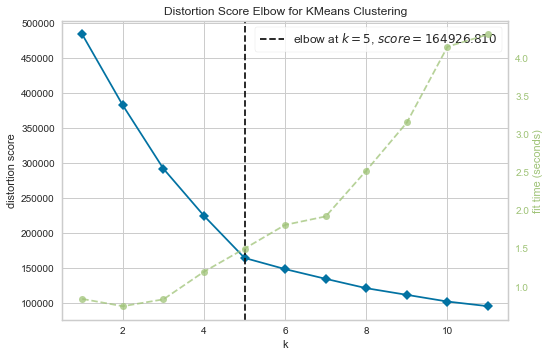

In [50]:
#starting k-means algorithm
std = StandardScaler()
x_std = std.fit_transform(rfm)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(x_std)        # Fit the data to the visualizer
visualizer.show()  


In [51]:
rfm.head()

Recency  Frequency  Monetary  review_score
0    299.0          1     115.0             1
1    420.0          1      67.0             4
2    560.0          1     195.0             5
3    389.0          1     179.0             5
4    161.0          1     107.0             4

In [52]:

#k_means clustering
model_k = KMeans(n_clusters=4)
kmeans = model_k.fit(x_std)
rfm['cluster'] = kmeans.labels_

C:\Users\wha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


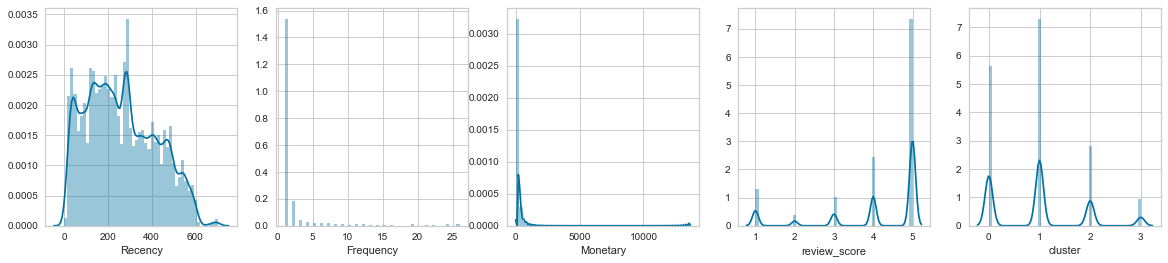

In [53]:
fig, axes = plt.subplots(1,5, figsize=(20,4))
for i, feature in enumerate(list(rfm.columns)):
    sns.distplot(rfm[feature],ax=axes[i])

In [54]:
rfm

Recency  Frequency  Monetary  review_score  cluster
0         299.0          1     115.0             1        2
1         420.0          1      67.0             4        0
2         560.0          1     195.0             5        0
3         389.0          1     179.0             5        0
4         161.0          1     107.0             4        1
...         ...        ...       ...           ...      ...
120904    165.0          3      81.0             3        2
120905    165.0          3      81.0             3        2
120906    110.0          1      63.0             4        1
120907     89.0          1     214.0             5        1
120908    368.0          1      46.0             5        0

[120909 rows x 5 columns]

In [55]:
RFM_norm1=rfm.copy()

In [56]:
#kmeans clustering
RFM_norm1=RFM_norm1.drop(['cluster'], axis=1)
model=KMeans(n_clusters=4,random_state=1231)
#predict the labels of clusters.
label = model.fit_predict(RFM_norm1)


In [57]:
#First methode to Plot the clusters obtained using k means
'''fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(model.cluster_centers_[:, 3],
            model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(RFM_norm1['Recency'],RFM_norm1['Frequency'],RFM_norm1['Monetary'],
                     c=label,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Rencency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()'''

"fig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nscatter = ax.scatter(model.cluster_centers_[:, 3],\n            model.cluster_centers_[:, 0],\n            model.cluster_centers_[:, 2],\n            s = 250,\n            marker='o',\n            c='red',\n            label='centroids')\nscatter = ax.scatter(RFM_norm1['Recency'],RFM_norm1['Frequency'],RFM_norm1['Monetary'],\n                     c=label,s=20, cmap='winter')\n\n\nax.set_title('K-Means Clustering')\nax.set_xlabel('Rencency')\nax.set_ylabel('Frequency')\nax.set_zlabel('Monetary')\nax.legend()\nplt.show()"

No handles with labels found to put in legend.


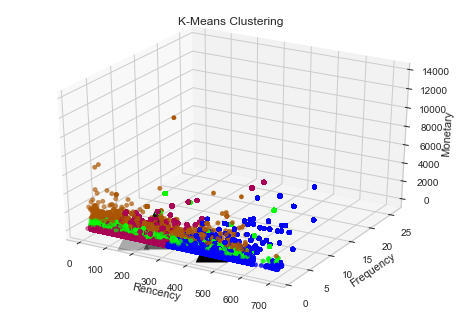

In [58]:
#second method to plot the clusters obtained using k means
model=KMeans(n_clusters=4,random_state=1231).fit(RFM_norm1)
centers= model.cluster_centers_
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(RFM_norm1['Recency'],RFM_norm1['Frequency'],RFM_norm1['Monetary'],cmap="brg",c=model.predict(RFM_norm1))
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c='black',marker='^',s=1000)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rencency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()

In [59]:
#Third methode to Plot the clusters obtained using k means
#px.scatter_3d(RFM_norm1,x='Recency',y='Frequency',z='Monetary',color='cluster')

In [60]:
#RFM_norm1=rfm1.drop(['customer_id'], axis=1)
#RFM_norm1=RFM_norm1.drop(['cluster'], axis=1)
model=KMeans(n_clusters=4,random_state=1231).fit(RFM_norm1)
labels=model.labels_
centers= model.cluster_centers_
centers.shape
RFM_norm1['cluster_kmeans'] = labels

In [61]:
RFM_norm1['cluster_kmeans'].unique()
RFM_norm1=RFM_norm1.drop(columns=['review_score'])

In [62]:
RFM_norm1=RFM_norm1.drop(columns=['cluster_kmeans'])

In [63]:
RFM_norm1

Recency  Frequency  Monetary
0         299.0          1     115.0
1         420.0          1      67.0
2         560.0          1     195.0
3         389.0          1     179.0
4         161.0          1     107.0
...         ...        ...       ...
120904    165.0          3      81.0
120905    165.0          3      81.0
120906    110.0          1      63.0
120907     89.0          1     214.0
120908    368.0          1      46.0

[120909 rows x 3 columns]

   Recency  Frequency  Monetary
0    299.0          1     115.0
1    420.0          1      67.0
2    560.0          1     195.0
3    389.0          1     179.0
4    161.0          1     107.0


C:\Users\wha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
No handles with labels found to put in legend.


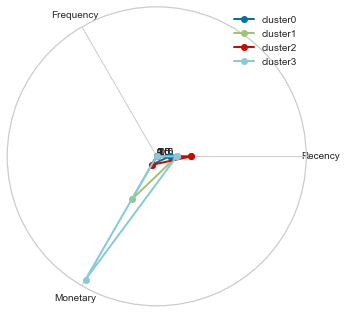

In [64]:
import pandas as pd
from sklearn.cluster import KMeans

k=4 # number of clusters

data_std = RFM_norm1 
print(data_std.iloc[range(5)] )

kmodel = KMeans(n_clusters=k, n_jobs=4)
kmodel.fit(data_std)
kmodel.cluster_centers_
clusters=kmodel.labels_
pd.Series(kmodel.labels_).value_counts() # cluster count


labels = data_std.columns 
k = 4
plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c'] 

plot_data = kmodel.cluster_centers_
angles = np.linspace(0, 2*np.pi, 3, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 
fig = plt.figure()
ax = fig.add_subplot(111, polar=True) 
ax.set_rgrids(np.arange(0.01,3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc = 4)

for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'cluster'+str(i), linewidth=2)

plt.legend()
plt.show()

In [64]:
RFM_norm1.to_csv('RFM_norm.csv')

In [63]:
#A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.
#The silhouette score measures the distance between all the data points within the same cluster. 
#The lower this distance, the better the silhouette score.
#It also measures the distance between an object and the data points in the nearest cluster. 
#The higher this distance, the better.

print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(RFM_norm1, labels))
#This isn't a bad model, but we have to try on the dbscan model

Silhoette Coefficient: 0.470


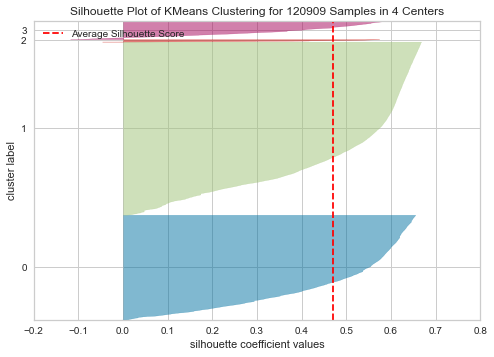

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000161B0A832E0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=1231))

In [64]:
# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(n_clusters=4,random_state=1231), RFM_norm1, colors='yellowbrick')

In [65]:
RFM_norm1

Recency  Frequency  Monetary
0         299.0          1     115.0
1         420.0          1      67.0
2         560.0          1     195.0
3         389.0          1     179.0
4         161.0          1     107.0
...         ...        ...       ...
120904    165.0          3      81.0
120905    165.0          3      81.0
120906    110.0          1      63.0
120907     89.0          1     214.0
120908    368.0          1      46.0

[120909 rows x 3 columns]

Text(0, 0.5, 'Epsilon')

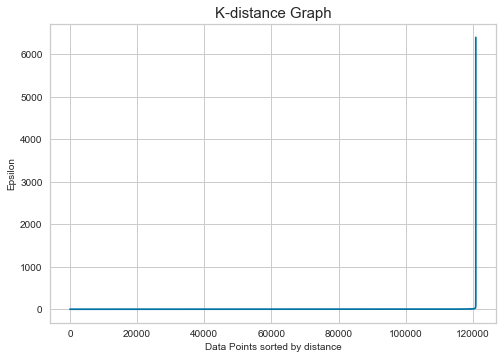

In [66]:
#Calculate the average distance between each point 
#in the data set and its 20 nearest neighbors (my selected MinPts value)
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
#RFM_norm1=RFM_norm1.drop(['cluster_kmeans'], axis=1)
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(RFM_norm1)
distances, indices = neighbors_fit.kneighbors(RFM_norm1)
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=15)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
#when we zoom on in this plot(points sorted by distance to the 6th nearest neighbor),
#it looks like the optimal value for ε is around 50

In [109]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps=65, min_samples = 10).fit(RFM_norm1)
#clusters = dbscan.fit_predict(RFM_norm1)
labels1=dbscan.labels_
no_clusters = len(np.unique(labels1))
no_noise = np.sum(np.array(labels1) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
RFM_norm1['cluster_dbscan'] = labels1
# set of clusters labels
set(labels1)
dt=RFM_norm1.values
dt=dt.astype('float32')

Estimated no. of clusters: 4
Estimated no. of noise points: 182


In [110]:
#First methos to plot clusters using DBSCAN
'''fig = px.scatter_3d(dt, x= dt[:,0], y= dt[:,1],z = dt[:,2],
color=RFM_norm1['cluster_dbscan'], labels={'x':'Recency','y':'Frequency','z':'Monetory'} )
fig.show()'''

"fig = px.scatter_3d(dt, x= dt[:,0], y= dt[:,1],z = dt[:,2],\ncolor=RFM_norm1['cluster_dbscan'], labels={'x':'Recency','y':'Frequency','z':'Monetory'} )\nfig.show()"

In [111]:
#Second method to Plot the clusters obtained using DBSCAN
''''fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(RFM_norm['Recency'],RFM_norm1['Frequency'],RFM_norm1['Monetary'],cmap="plasma",c=dbscan.fit_predict(RFM_norm1))
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Rencency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()'''

'\'fig=plt.figure()\nax=fig.add_subplot(111,projection=\'3d\')\nax.scatter(RFM_norm[\'Recency\'],RFM_norm1[\'Frequency\'],RFM_norm1[\'Monetary\'],cmap="plasma",c=dbscan.fit_predict(RFM_norm1))\nax.set_title(\'DBSCAN Clustering\')\nax.set_xlabel(\'Rencency\')\nax.set_ylabel(\'Frequency\')\nax.set_zlabel(\'Monetary\')\nax.legend()\nplt.show()'

In [112]:
RFM_norm1["cluster_dbscan"].unique()

array([ 0, -1,  2,  1], dtype=int64)

In [113]:
dt.shape

(101331, 5)

In [114]:
# Remove the noise
range_max = len(dt)
dt1 = np.array([dt[i] for i in range(0, range_max) if labels1[i] != -1])
labels = np.array([labels1[i] for i in range(0, range_max) if labels1[i] != -1])


In [115]:
dt1.shape

(101149, 5)

In [60]:
#plotting clusters using dbscan after deleting the noise points
#fig1 = px.scatter_3d(dt1, x= dt1[:,0], y= dt1[:,1],z = dt1[:,2],
#color=dt1[:,3], labels={'x':'Recency','y':'Frequency','z':'Monetory'} )
#fig1.show()

In [116]:
#silhouette score for dbscan
from sklearn import metrics
print("Silhoette Coefficient: %0.3f" % metrics.silhouette_score(RFM_norm1, labels1))


Silhoette Coefficient: 0.850


In [122]:
RFM_norm1

Recency  Frequency  Monetary  review_score  cluster_dbscan
0         299.0          1     115.0             1               0
1         420.0          1      67.0             4               0
2         560.0          1     195.0             5               0
3         389.0          1     179.0             5               0
4         161.0          1     107.0             4               0
...         ...        ...       ...           ...             ...
101328    165.0          3      81.0             3               0
101329    165.0          3      81.0             3               0
101330    110.0          1      63.0             4               0
101331     89.0          1     214.0             5               0
101332    368.0          1      46.0             5               0

[101331 rows x 5 columns]

In [124]:
#plotting clusters using dbscan after deleting the noise points
fig1 = px.scatter_3d(dt1, x= dt1[:,0], y= dt1[:,1],z = dt1[:,2],
color=dt1[:,4], labels={'x':'Recency','y':'Frequency','z':'Monetory'} )
fig1.show()

In [67]:
model =  DBSCAN(eps=65, min_samples = 10).fit(RFM_norm1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')


In [68]:
visualizer.fit(RFM_norm1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

AttributeError: 'DBSCAN' object has no attribute 'n_clusters'